In [ ]:
#  Let's install our librarys
# check torchSummary
!pip install torchsummary

In [5]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [6]:
# Import library
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

In [7]:
# Define data directory for train and validation data
data_dir = "/content/drive/MyDrive/TA-GROUP11/DATASET"
train_dir = data_dir + "/DATA_TRAINING"
valid_dir = data_dir + "/DATA_VALID"
corn_diseases = os.listdir(train_dir)
corn_diseases_valid = os.listdir(valid_dir)
corn_diseases

['Training_GLS', 'Training_HL', 'Training_Rust', 'Training_NLB']

In [8]:
# Let's Calculate total files from disease corn
train_total = 0
for path in corn_diseases:
    train_total += len(os.listdir(train_dir +'/'+ path))
print("Total of Disease Classes : %d"%len(corn_diseases))
print("Total all train files : %d"%train_total)
valid_total = 0
for path in corn_diseases_valid:
  valid_total += len(os.listdir(valid_dir + '/' + path))
print("Total of Disease Classes : %d"%len(corn_diseases))
print("Total all valid files : %d"%valid_total)

print("Total all files : %d"%(train_total + valid_total))

Total of Disease Classes : 4
Total all train files : 7336
Total of Disease Classes : 4
Total all valid files : 1829
Total all files : 9165


In [9]:
# Number of images for each disease
nums = {}
print("Train Dataframe")
for disease in corn_diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
print(img_per_class)

nums = {}
print("Valid Dataframe")
for disease in corn_diseases_valid:
    nums[disease] = len(os.listdir(valid_dir + '/' + disease))

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
print(img_per_class)
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

Train Dataframe
               no. of images
Training_GLS            1652
Training_HL             1859
Training_Rust           1917
Training_NLB            1908
Valid Dataframe
            no. of images
Valid_GLS             410
Valid_HL              465
Valid_NLB             477
Valid_Rust            477


In [10]:
batch_size = 32
crop_size = 256

train_transform = transforms.Compose([
  transforms.RandomRotation(15),
  transforms.RandomResizedCrop(crop_size, scale = (0.8,1.0)),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor()
])
valid_transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(crop_size),
  transforms.ToTensor()
])

In [11]:
# datasets for validation and training
# https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
# root fill using root dir, untuk hal ini train_dir dan valid_dir
# tranform using ToTensor()
# Return ImageFolder and transforms to Tensor
# ToTensor = Convert a PIL image PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] 
# if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) 
# or if the numpy.ndarray has dtype = np.uint8 
train = ImageFolder(train_dir, transform=train_transform)
valid = ImageFolder(valid_dir, transform=valid_transform) 

# Plotting Image

## Show Img Sample


In [12]:
# for checking some images from training dataset
# Helper funciton
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Label :Training_GLS(0)


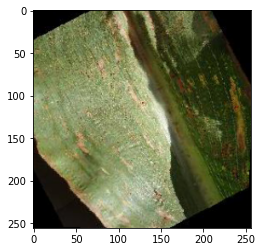

In [13]:
show_image(*train[1])

Label :Training_GLS(0)


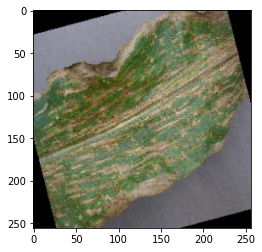

In [14]:
show_image(*train[3])

## Plotting RGB Channel

In [15]:
# Plotting RGB Channel
# plotting the original image and the RGB channels
def show_plot(image,label):
  f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
  f.set_figwidth(15)
  ax1.imshow(image.permute(1, 2, 0))

  # RGB channels
  # CHANNELID : 0 for Red, 1 for Green, 2 for Blue. 
  ax2.imshow(image.permute(1, 2, 0)[:, :, 0]) #Red
  ax3.imshow(image.permute(1, 2, 0)[:, : , 1]) #Green
  ax4.imshow(image.permute(1, 2, 0)[:, : , 2]) #Blue
  f.suptitle('Different Channels of Image')

torch.Size([3, 256, 256]) 3
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0078, 0.0431, 0.0157, 0.0314, 0.0157, 0.0392,
        0.0588, 0.2000, 0.5137, 0.4980, 0.5098, 0.4667, 0.4588, 0.4667, 0.4784,
        0.4824, 0.4824, 0.5020, 0.5176, 0.4824, 0.5059, 0.5294, 0.5255, 0.4863,
        0.4431, 0.4353, 0.4627, 0.5098, 0.5569, 0.5490, 0.5373, 0.5529, 0.5725,
        0.5922, 0.5647, 0.5882, 0.6157, 0.6353, 0.6353, 0.6196, 0.6118, 0.6000,
        0.5922, 0.6000, 0.6118, 0.6039, 0.5922, 0.5882, 0.5765, 0.5333, 0.5725,
        0.5725, 0.5412, 0.5686, 0.5882, 0.5608, 0.5451, 0.5843, 0.5843, 0.5647,
        0.5490, 0.5333, 0.5294, 0.5098, 0.4824, 0.5020, 0.5137, 0.5137, 0.5216,
        0.5333, 0.5412, 0.5569, 0.5804, 0.5961, 0.5137, 0.4667, 0.4667, 0.5176,
        0.54

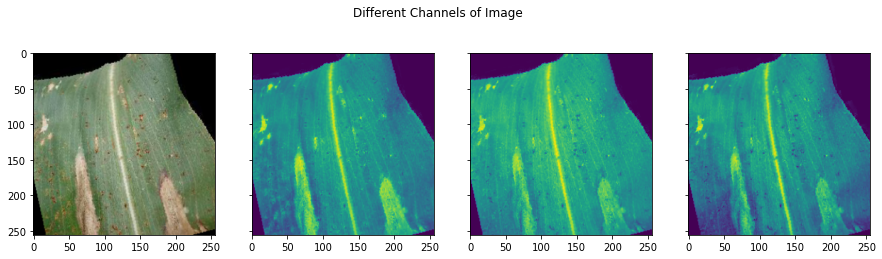

In [16]:
# For Remove
img, label =  train[-1]
print(img.shape,label)
print(img[1, :, 3])
show_plot(img,label)

# Show Feature array from img

In [17]:
# img,label = train[1]
# img = img.numpy()
# img = np.squeeze(img[0,:,:])

# fig = plt.figure(figsize = (12,12)) 
# ax = fig.add_subplot(111)
# ax.imshow(img, cmap='gray')
# width, height = img.shape
# thresh = img.max()/2.5
# for x in range(width):
#     for y in range(height):
#         val = round(img[x][y],2) if img[x][y] !=0 else 0
#         ax.annotate(str(val), xy=(y,x),
#             color='white' if img[x][y]<thresh else 'black')

# Build iterable dataloader

In [18]:
# Setting the seed value
# https://pytorch.org/docs/stable/generated/torch.manual_seed.html
#  generate randoom_number
# rentang : [-0x8000_0000_0000_0000, 0xffff_ffff_ffff_ffff]
random_seed = 7
torch.manual_seed(random_seed)

In [19]:
batch_size = 32

In [20]:
# DataLoaders for training and validation
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

In [40]:
# helper function to show a batch of training instances
def show_batch(data,nrow = 8):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        print(make_grid(images, nrow).shape)
        ax.imshow(make_grid(images, nrow).permute(1, 2, 0))
        break

In [42]:
# Images for first batch of training
show_batch(train_dl,8)

Output hidden; open in https://colab.research.google.com to view.

# Modelling

In [23]:
# for moving data into GPU (if available)
#  From internet ot check, device kita menggunakan GPU atau CPU
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [24]:
device = get_default_device()
device

device(type='cuda')

## Restnet9 Model

In [25]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

In [26]:
# for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


# base class for the model
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                   # Generate prediction
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)          # Calculate accuracy
        return {"val_loss": loss.detach(), "val_accuracy": acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine loss  
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy} # Combine accuracies
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))

In [27]:
# Architecture for training
#  Final Architecture
# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)


# resnet architecture 
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) # out_dim : 128 x 64 x 64 
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        
        self.conv3 = ConvBlock(128, 256, pool=True) # out_dim : 256 x 16 x 16
        self.conv4 = ConvBlock(256, 512, pool=True) # out_dim : 512 x 4 x 44
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out        

In [28]:
# defining the model and moving it to the GPU
model = to_device(ResNet9(3, len(train.classes)), device) 
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

# Visualize Conv Layer

In [29]:
conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
relu1 = nn.ReLU()
maxPool = nn.MaxPool2d(4)
conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
relu2 = nn.ReLU()
batchNorm = nn.BatchNorm2d(3)

In [71]:
batch_images = None
for images, _ in train_dl:
  batch_images  = images
  break
print(batch_images.shape)

torch.Size([32, 3, 256, 256])


In [72]:
for i in range(len(batch_images)):
  img = batch_images[i]
  c,w,h = img.shape
  img = img.reshape(1,c,w,h)
  out1 = conv1(torch.tensor(img))
  out_1 = out1.squeeze(0).detach()
  batch_images[i] = out_1[0,:,:]
print(batch_images.shape)

torch.Size([32, 3, 256, 256])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 1034, 2066])


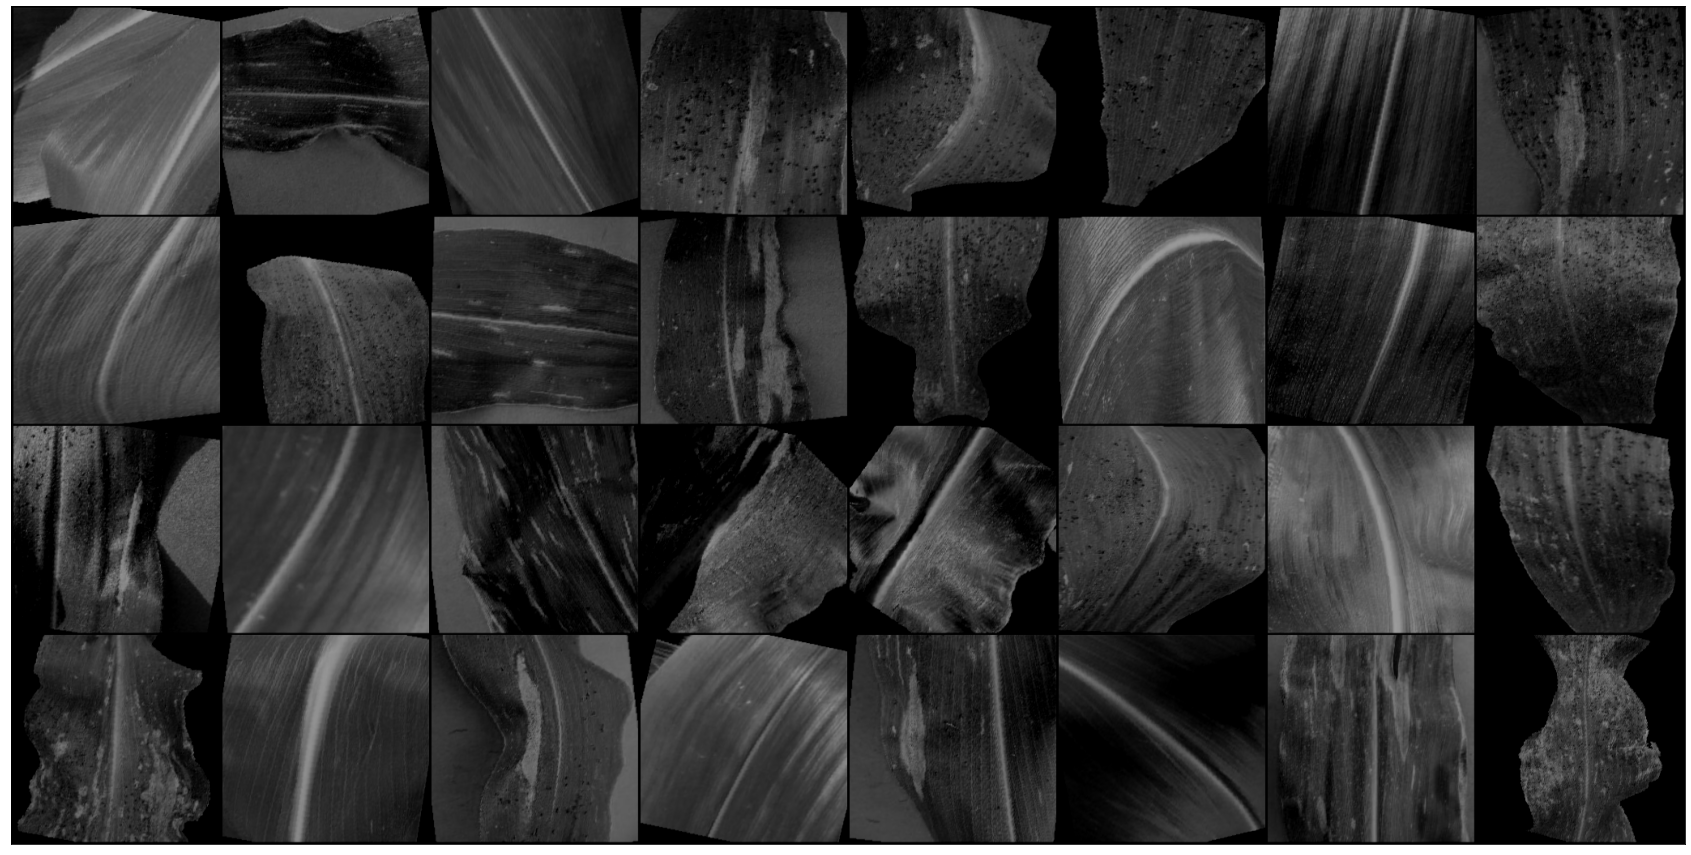

In [73]:
nrow = 8
fig, ax = plt.subplots(figsize=(30, 30))
ax.set_xticks([]); ax.set_yticks([])
print(make_grid(batch_images, nrow).shape)
ax.imshow(make_grid(batch_images, nrow).permute(1, 2, 0))

In [78]:
# img,_ = train[0]
img = torch.FloatTensor(np.asarray(batch_images[0])).numpy()
c,w,h = img.shape
img = img.reshape(1,c,w,h)

print(img.shape)

(1, 3, 256, 256)


torch.Size([1, 3, 256, 256])
(3, 256, 256)
(256, 256)
[[-0.06361883 -0.027494    0.0485002  ... -0.22486854 -0.22486854
  -0.16779277]
 [-0.07311959 -0.03346075 -0.00522165 ... -0.17168805 -0.17168805
  -0.12750709]
 [-0.06928927 -0.0243153   0.00973517 ... -0.17168805 -0.17168805
  -0.12750709]
 ...
 [-0.14864466 -0.17168805 -0.17168805 ... -0.17168805 -0.17168805
  -0.12750709]
 [-0.14864466 -0.17168805 -0.17168805 ... -0.17168805 -0.17168805
  -0.12750709]
 [-0.04915843 -0.02981009 -0.02981009 ... -0.02981009 -0.02981009
  -0.03014293]]


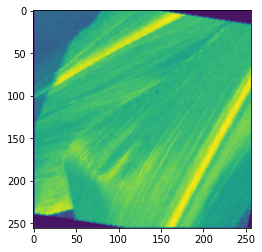

In [80]:
out1 = conv1(torch.tensor(img))
print(out1.shape)
out_1 = out1.squeeze(0).detach().numpy()
print(out_1.shape)
print(out_1[0,:,:].shape)
print(out_1[2,:,:])
plt.imshow(out_1[0,:,:])

(3, 256, 256)
[[0.07238036 0.07238036 0.07238036 ... 0.07238036 0.07238036 0.07238036]
 [0.07238036 0.07238036 0.07238036 ... 0.07238036 0.07238036 0.07238036]
 [0.07238036 0.07238036 0.07238036 ... 0.07238036 0.07238036 0.07238036]
 ...
 [0.12759039 0.14254054 0.01817983 ... 0.07238036 0.07238036 0.07238036]
 [0.14191374 0.09122507 0.0652147  ... 0.07238036 0.07238036 0.07238036]
 [0.06497438 0.01624495 0.01302794 ... 0.07238036 0.07238036 0.07238036]]


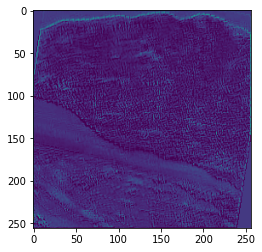

In [32]:
# applied Relu
out1 = relu1(out1)
out_1 = out1.squeeze(0).detach().numpy()
print(out_1.shape)
print(out_1[1,:,:])
plt.imshow(out_1[1,:,:])


(3, 256, 256)
[[ 0.8542289   0.8542289   0.8542289  ...  0.8542289   0.8542289
   0.8542289 ]
 [ 0.8542289   0.8542289   0.8542289  ...  0.8542289   0.8542289
   0.8542289 ]
 [ 0.8542289   0.8542289   0.8542289  ...  0.8542289   0.8542289
   0.8542289 ]
 ...
 [ 2.5616007   3.0239346  -0.82192373 ...  0.8542289   0.8542289
   0.8542289 ]
 [ 3.0045507   1.4370023   0.6326308  ...  0.8542289   0.8542289
   0.8542289 ]
 [ 0.6251988  -0.88176    -0.9812463  ...  0.8542289   0.8542289
   0.8542289 ]]


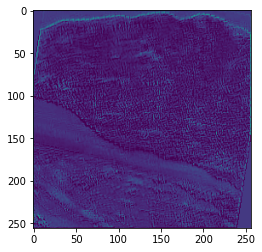

In [33]:
# Applied  BathcNorm
out1 = batchNorm(out1)
out_1 = out1.squeeze(0).detach().numpy()
print(out_1.shape)
print(out_1[1,:,:])
plt.imshow(out_1[1,:,:])

(3, 64, 64)
[[ 0.8542289   0.8542289   1.2329347  ...  1.3067037   1.1154361
   0.8542289 ]
 [ 0.8542289   0.8542289   1.270961   ...  1.6785085   1.9151161
   2.1022542 ]
 [ 0.8542289   0.8542289   1.2995657  ...  0.89623946  0.95056313
   2.128518  ]
 ...
 [11.416225    4.4690275   3.6854594  ...  0.8542289   0.8542289
   0.8542289 ]
 [ 5.3397326   4.524249    3.6309335  ...  0.8542289   0.8542289
   0.8542289 ]
 [ 3.0239346   2.0763688   2.269885   ...  0.8542289   0.8542289
   0.8542289 ]]


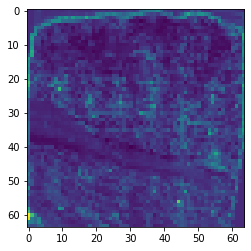

In [34]:
# Applied  MaxPoold2d
out1 = maxPool(out1)
out_1 = out1.squeeze(0).detach().numpy()
print(out_1.shape)
print(out_1[1,:,:])
plt.imshow(out_1[1,:,:])

In [35]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def show_plot_cnn(img,label,conv):
  f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
  f.set_figwidth(15)
  ax1.title.set_text('Original Image')
  ax1.imshow(img.permute(1,2,0))

  # Reshape img
  img = torch.FloatTensor(np.asarray(img)).numpy()
  c,w,h = img.shape
  img = img.reshape(1,c,w,h)

  # conv1
  out1 = conv(torch.tensor(img))
  out_1 = out1.squeeze(0).detach().numpy()
  ax2.title.set_text('Applied Conv')
  ax2.imshow(out_1[1,:,:])

  # applied Relu
  out1 = relu1(out1)
  out_1 = out1.squeeze(0).detach().numpy()
  ax3.title.set_text('Applied Relu')
  ax3.imshow(out_1[1,:,:])

  #  # applied MaxPool
  out1 = maxPool(out1)
  out_1 = out1.squeeze(0).detach().numpy()
  ax4 = inset_axes(ax4, width="100%", height="100%")
  ax4.title.set_text('MaxPool')
  ax4.imshow(out_1[1,:,:])

  # RGB channels
  # CHANNELID : 0 for Red, 1 for Green, 2 for Blue. 
  f.suptitle('Feature Extraction CNN Feature map visualization')

In [36]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def show_plot_cnn_itr(dataiter,conv):
  f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
  f.set_figwidth(20)
  ax1.title.set_text('Original Image')
  # iterable dataiter
  dd = None
  for data in dataiter:
    dd = data
    break
  img = dd[0][0] #get first image from first batch from our dataloader
  ax1.imshow(img.permute(1,2,0))

  # Reshape img
  img = torch.FloatTensor(np.asarray(img)).numpy()
  c,w,h = img.shape
  img = img.reshape(1,c,w,h)

  # conv1
  out1 = conv(torch.tensor(img))
  out_1 = out1.squeeze(0).detach().numpy()
  ax2.title.set_text('Applied Conv')
  ax2.imshow(out_1[1,:,:])

  # applied Relu
  out1 = relu1(out1)
  out_1 = out1.squeeze(0).detach().numpy()
  ax3.title.set_text('Applied Relu')
  ax3.imshow(out_1[1,:,:])

  # applied Batchnorm
  out1 = batchNorm(out1)
  out_1 = out1.squeeze(0).detach().numpy()
  plt.imshow(out_1[1,:,:])
  ax4 = inset_axes(ax4, width="100%", height="100%")
  ax4.title.set_text('BatchNorm')
  ax4.imshow(out_1[1,:,:])

  #  # applied MaxPool
  out1 = maxPool(out1)
  out_1 = out1.squeeze(0).detach().numpy()
  ax5 = inset_axes(ax5, width="100%", height="100%")
  ax5.title.set_text('MaxPool')
  ax5.imshow(out_1[1,:,:])

  # RGB channels
  # CHANNELID : 0 for Red, 1 for Green, 2 for Blue. 
  f.suptitle('Feature Extraction CNN Feature map visualization')

In [37]:
def get_img_from_uploaded(uploaded):
  label = str(list(uploaded.keys())[0])
  path = '/content/' + label
  def getFilenameFileExtension(path):
    longFileName,fileExtension = path.split('.',2)
    filename = [s for s in longFileName.split('/')][-1]
    return filename,fileExtension

  # img = Image.open(path).convert('L').resize((28, 28), Image.ANTIALIAS)
  img = Image.open(path)
  if img.mode == 'RGBA':
    filename,fileextension = getFilenameFileExtension(path)
    img.load()
    background = Image.new("RGB", img.size, (255, 255, 255))
    background.paste(img, mask = img.split()[3])
    background.save(filename+'.'+'JPG', "JPEG", quality=100)
    print(background.mode)
    img = Image.open(filename+'.'+'JPG')
  # Convert and reshape
  print(img.mode)
  img.convert('RGB')
  img = img.resize((256, 256), Image.ANTIALIAS)


  # img = np.array(img)

  # Convert to tensor
  # Define a transform to convert the image to tensor
  transform = transforms.ToTensor()

  # Convert the image to PyTorch tensor
  img = transform(img)
  return img

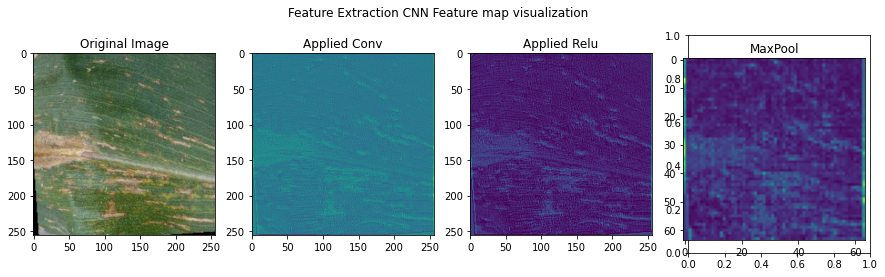

In [38]:
# from PIL import Image
# from google.colab import files
# import cv2
# uploaded = files.upload()
# dummy_img = get_img_from_uploaded(uploaded)
# dummy = (dummy_img,99)
dummy = train[6]
# show_plot_cnn_itr(train_dl,conv1)
show_plot_cnn(*dummy,conv1)

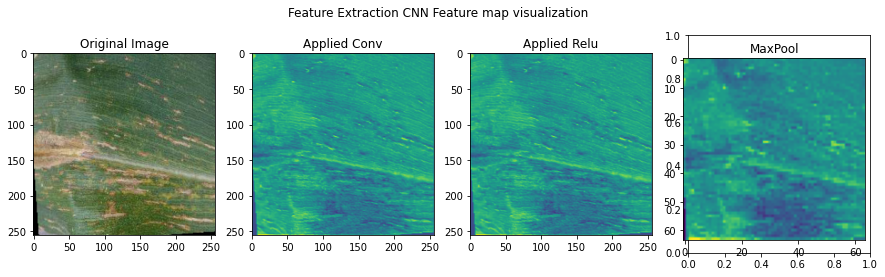

In [39]:
show_plot_cnn(*dummy,conv2)